<a href="https://colab.research.google.com/github/dhanushkasisil2700/Car_Price_Prediction_ML/blob/main/Car_Price_Prediction_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install plotly

In [ ]:
pip install opendatasets

In [ ]:
import opendatasets as od
import pandas as pd
import plotly.express as px
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [ ]:
if not os.path.exists('car_price_prediction'):
    od.download('https://www.kaggle.com/datasets/deepcontractor/car-price-prediction-challenge')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: dhanushkasisil
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/deepcontractor/car-price-prediction-challenge


100%|██████████| 429k/429k [00:00<00:00, 60.7MB/s]

In [ ]:
raw_df = pd.read_csv('/content/car-price-prediction-challenge/car_price_prediction.csv')

# Data Cleaning

In [ ]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

# Distribution of price

In [ ]:
raw_df_sample = raw_df.sample(5000)

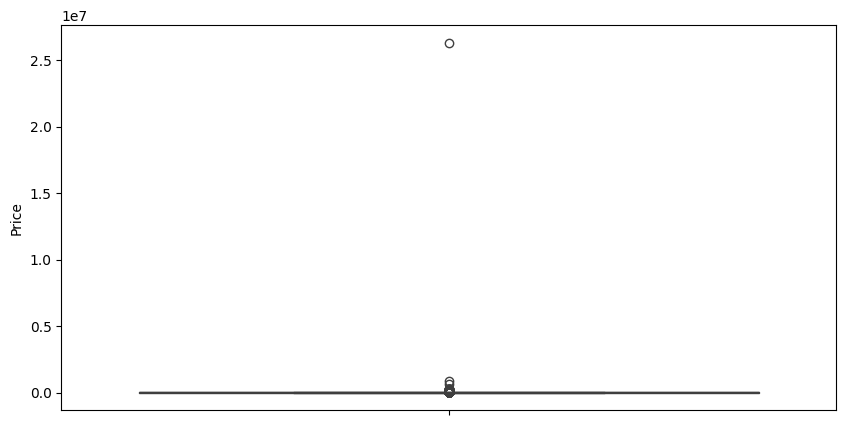

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(raw_df['Price'])
plt.show()

Removing extreme outliers

In [ ]:
#drop raw where price > 4e6
raw_df = raw_df[raw_df['Price'] < 175000]

In [ ]:
raw_df['Price'][raw_df['Price'] > 175000].count()

0

In [ ]:
fig = px.box(raw_df, y='Price', title="Boxplot of Price Distribution")
fig.show()

In [ ]:
raw_df = raw_df[raw_df['Price'] < 400000]

In [ ]:
fig = px.box(raw_df, y='Price', color=raw_df['Manufacturer'], title="Boxplot of Price Distribution")
fig.show()

In [ ]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19221 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19221 non-null  int64  
 1   Price             19221 non-null  int64  
 2   Levy              19221 non-null  object 
 3   Manufacturer      19221 non-null  object 
 4   Model             19221 non-null  object 
 5   Prod. year        19221 non-null  int64  
 6   Category          19221 non-null  object 
 7   Leather interior  19221 non-null  object 
 8   Fuel type         19221 non-null  object 
 9   Engine volume     19221 non-null  object 
 10  Mileage           19221 non-null  object 
 11  Cylinders         19221 non-null  float64
 12  Gear box type     19221 non-null  object 
 13  Drive wheels      19221 non-null  object 
 14  Doors             19221 non-null  object 
 15  Wheel             19221 non-null  object 
 16  Color             19221 non-null  object 
 17

In [ ]:
raw_df

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,45798355,8467,-,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.0 Turbo,300000 km,4.0,Manual,Rear,02-Mar,Left wheel,Silver,5
19233,45778856,15681,831,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600 km,4.0,Tiptronic,Front,04-May,Left wheel,Red,8
19234,45804997,26108,836,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2,116365 km,4.0,Automatic,Front,04-May,Left wheel,Grey,4
19235,45793526,5331,1288,CHEVROLET,Captiva,2007,Jeep,Yes,Diesel,2,51258 km,4.0,Automatic,Front,04-May,Left wheel,Black,4


Conver engine column into turbo and not turbo

In [ ]:
#new column "Turbo"
raw_df['Turbo'] = raw_df['Engine volume'].str.contains('Turbo')
raw_df['Turbo'] = raw_df['Turbo'].astype(int)

In [ ]:
raw_df['Engine volume'] = raw_df['Engine volume'].str.replace('Turbo', '')
raw_df['Engine volume'] = raw_df['Engine volume'].astype(float)

In [ ]:
raw_df

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Turbo
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12,0
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3.0,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8,0
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2,0
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,45798355,8467,-,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.0,300000 km,4.0,Manual,Rear,02-Mar,Left wheel,Silver,5,1
19233,45778856,15681,831,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600 km,4.0,Tiptronic,Front,04-May,Left wheel,Red,8,0
19234,45804997,26108,836,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2.0,116365 km,4.0,Automatic,Front,04-May,Left wheel,Grey,4,0
19235,45793526,5331,1288,CHEVROLET,Captiva,2007,Jeep,Yes,Diesel,2.0,51258 km,4.0,Automatic,Front,04-May,Left wheel,Black,4,0


convert millage column into numeric

In [ ]:
raw_df['Mileage'] = raw_df['Mileage'].str.replace('km', '')

In [ ]:
#convert millage data type into float
raw_df['Mileage'] = raw_df['Mileage'].astype(float)

In [ ]:
raw_df['Mileage'].describe()

count    1.922100e+04
mean     1.533481e+06
std      4.842399e+07
min      0.000000e+00
25%      7.023200e+04
50%      1.260430e+05
75%      1.890000e+05
max      2.147484e+09
Name: Mileage, dtype: float64

Modify levy column

In [ ]:
raw_df['Levy'].unique()

array(['1399', '1018', '-', '862', '446', '891', '761', '751', '394',
       '1053', '1055', '1079', '810', '2386', '1850', '531', '586',
       '1249', '2455', '583', '1537', '1288', '915', '1750', '707',
       '1077', '1486', '1091', '650', '382', '1436', '1194', '503',
       '1017', '1104', '639', '629', '919', '781', '530', '640', '765',
       '777', '779', '934', '769', '645', '1185', '1324', '830', '1187',
       '1111', '760', '642', '1604', '1095', '966', '473', '1138', '1811',
       '988', '917', '1156', '687', '11714', '836', '1347', '2866',
       '1646', '259', '609', '697', '585', '475', '690', '308', '1823',
       '1361', '1273', '924', '584', '2078', '831', '1172', '893', '1872',
       '1885', '1266', '447', '2148', '1730', '730', '289', '502', '333',
       '1325', '247', '879', '1342', '1327', '1598', '1514', '1058',
       '738', '1935', '481', '1522', '1282', '456', '880', '900', '798',
       '1277', '442', '1051', '790', '1292', '1047', '528', '1211',
       

In [ ]:
from math import nan
raw_df['Levy'] = raw_df['Levy'].str.replace('-', "0")

In [ ]:
raw_df['Levy'] = raw_df['Levy'].astype(float)

In [ ]:
train_df = raw_df.copy()

In [ ]:
train_df.drop("ID", axis=1, inplace=True)

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19221 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             19221 non-null  int64  
 1   Levy              19221 non-null  float64
 2   Manufacturer      19221 non-null  object 
 3   Model             19221 non-null  object 
 4   Prod. year        19221 non-null  int64  
 5   Category          19221 non-null  object 
 6   Leather interior  19221 non-null  object 
 7   Fuel type         19221 non-null  object 
 8   Engine volume     19221 non-null  float64
 9   Mileage           19221 non-null  float64
 10  Cylinders         19221 non-null  float64
 11  Gear box type     19221 non-null  object 
 12  Drive wheels      19221 non-null  object 
 13  Doors             19221 non-null  object 
 14  Wheel             19221 non-null  object 
 15  Color             19221 non-null  object 
 16  Airbags           19221 non-null  int64  
 17

In [ ]:
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(train_df, test_size=0.2, random_state=42)
train_df.shape, test_df.shape

((15376, 18), (3845, 18))

In [ ]:
target = 'Price'
train_target = train_df[target]
test_target = test_df[target]
train_df.drop(target, axis=1, inplace=True)
test_df.drop(target, axis=1, inplace=True)

In [ ]:
numeric_cols = train_df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = train_df.select_dtypes(include=['object']).columns

In [ ]:
numeric_cols

Index(['Levy', 'Prod. year', 'Engine volume', 'Mileage', 'Cylinders',
       'Airbags', 'Turbo'],
      dtype='object')

In [ ]:
categorical_cols

Index(['Manufacturer', 'Model', 'Category', 'Leather interior', 'Fuel type',
       'Gear box type', 'Drive wheels', 'Doors', 'Wheel', 'Color'],
      dtype='object')

In [ ]:
raw_df[categorical_cols].nunique()

Manufacturer          63
Model               1580
Category              11
Leather interior       2
Fuel type              7
Gear box type          4
Drive wheels           3
Doors                  3
Wheel                  2
Color                 16
dtype: int64

In [ ]:
raw_df["Engine volume"].unique()

array([ 3.5,  3. ,  1.3,  2.5,  2. ,  1.8,  2.4,  4. ,  1.6,  3.3,  2.2,
        4.7,  1.5,  4.4,  1.4,  3.6,  2.3,  5.5,  2.8,  3.2,  3.8,  4.6,
        1.2,  5. ,  1.7,  2.9,  0.5,  1.9,  2.7,  4.8,  5.3,  0.4,  1.1,
        2.1,  0.7,  5.4,  3.7,  1. ,  2.6,  0.8,  0.2,  5.7,  6.7,  6.2,
        3.4,  4.3,  4.2,  0. , 20. ,  0.3,  5.9,  6.3,  5.6,  6. ,  0.6,
        4.5,  7.3,  0.1,  3.1,  6.4,  3.9,  0.9,  5.2,  5.8])

In [ ]:
train_target

17036     1882
4898      7056
16135     4861
9014     12281
4151     15681
         ...  
11296     8781
11976     9408
5395     18189
860      12544
15810    29166
Name: Price, Length: 15376, dtype: int64

In [ ]:
raw_df['Model'].nunique()

1580

In [ ]:
test = raw_df['Model']
test.shape

(19221,)

In [ ]:
import re
test = test.apply(lambda x: re.sub(r'[\[\]<>]', '', x))

In [ ]:
test.nunique(), test.shape

(1580, (19221,))

# Scalling Numerical Columns

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(raw_df[numeric_cols])

MinMaxScaler()

In [ ]:
train_df[numeric_cols] = scaler.transform(train_df[numeric_cols])
test_df[numeric_cols] = scaler.transform(test_df[numeric_cols])

# Encoding Categorical Columns

In [ ]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoder.fit(raw_df[categorical_cols])

OneHotEncoder(handle_unknown='ignore', sparse_output=False)

In [ ]:
encoded_columns = list(encoder.get_feature_names_out(categorical_cols))

import re
encoded_columns = [re.sub(r'[\[\]<>]', '', col) for col in encoded_columns]

all_columns = numeric_cols.tolist() + encoded_columns

In [ ]:
for col in categorical_cols:
    train_df[col] = train_df[col].astype(str)
    test_df[col] = test_df[col].astype(str)

In [ ]:
train_df[encoded_columns] = encoder.transform(train_df[categorical_cols])
test_df[encoded_columns] = encoder.transform(test_df[categorical_cols])

Streaming output truncated to the last 5000 lines.
<ipython-input-45-f9550d5ae7a8>:2: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

<ipython-input-45-f9550d5ae7a8>:2: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

<ipython-input-45-f9550d5ae7a8>:2: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

<ipytho

# Train Model

In [ ]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

initial_model = XGBRegressor(random_state=42)
initial_model.fit(train_df[all_columns], train_target)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [ ]:
initial_model.score(train_df[all_columns], train_target)

0.8638589352741992

In [ ]:
predictions = initial_model.predict(test_df[all_columns])

In [ ]:
mean_squared_error(test_target, predictions, squared=False)

9177.203621589286

In [ ]:
model = XGBRegressor(random_state=42, objective='reg:squarederror')
model.fit(train_df[all_columns], train_target)
print(model.score(train_df[all_columns], train_target))
predictions = model.predict(test_df[all_columns])
print(mean_squared_error(test_target, predictions, squared=False))

0.8638589352741992
9177.203621589286


In [ ]:
def try_features (para):
  model = XGBRegressor(random_state=42, objective='reg:squarederror', **para)
  model.fit(train_df[all_columns], train_target)
  print(model.score(train_df[all_columns], train_target))
  predictions = model.predict(test_df[all_columns])
  print(mean_squared_error(test_target, predictions, squared=False))
  return model

In [ ]:
try_features({'n_estimators': 500, 'max_depth': 20})

0.9869817589488432
9039.302681998272


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=20, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=500, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [ ]:
try_features({'min_split_loss': 1})

0.8638589352741992
9177.203621589286


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, min_split_loss=1, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [ ]:
try_features({'min_child_weight': 50, 'max_depth':20, 'n_estimators': 500})

0.9780309628435928
9128.21086173357


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=20, max_leaves=None,
             min_child_weight=50, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=500, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [ ]:
final_model = try_features({'n_estimators': 500, 'max_depth': 20})

0.9869817589488432
9039.302681998272


In [ ]:
importance_features_df = pd.DataFrame({"Importance": final_model.feature_importances_,
                                      "Feature": train_df[all_columns].columns})
importance_features_df = importance_features_df.sort_values("Importance", ascending=False)

In [ ]:
importance_features_df

,Importance,Feature
1672,0.046915,Gear box type_Tiptronic
744,0.045824,Model_Explorer
1356,0.043239,Model_SL 55 AMG
750,0.035180,Model_F150
1664,0.028876,Fuel type_Diesel
...,...,...
1132,0.000000,Model_Octavia SCOUT
1136,0.000000,Model_Omega 1
852,0.000000,Model_GLE 400
526,0.000000,Model_Captur QM3 Samsung


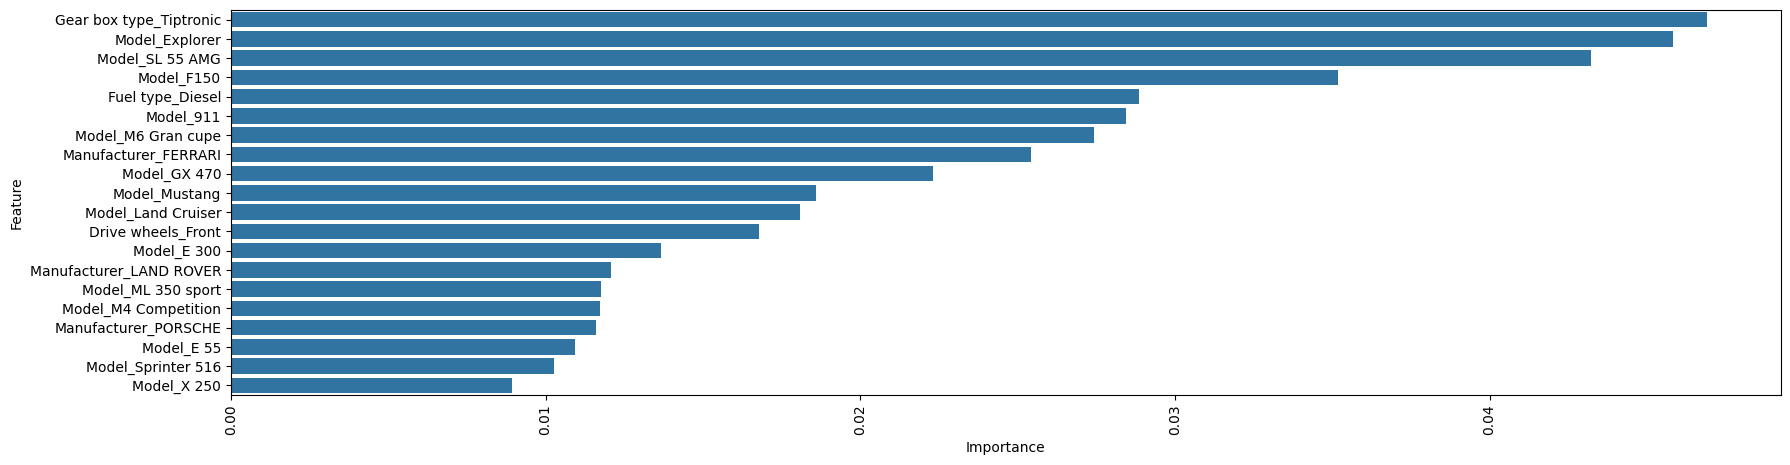

In [ ]:
plt.figure(figsize=(20, 5))
sns.barplot(data=importance_features_df.head(20) ,x="Importance", y="Feature")
plt.xticks(rotation=90)
plt.show()

It semms Model_911 maybe a outlier, remove it from our data and try again

In [ ]:
train_df["Model_911"].sum()

4.0

In [ ]:
test_df["Model_911"].sum()

1.0

In [ ]:
train_df.drop("Model_911", axis=1, inplace=True)
test_df.drop("Model_911", axis=1, inplace=True)

In [ ]:
all_columns.remove("Model_911")

In [ ]:
final_model = try_features({'n_estimators': 500, 'max_depth': 20})

0.9869773585854086
8982.642447007816


In [ ]:
try_features({'n_estimators': 1000, 'max_depth': 20})

0.9869992415069476
8984.943156768075


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=20, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [ ]:
test_target.describe()

count      3845.000000
mean      17165.220546
std       17181.679075
min           3.000000
25%        5645.000000
50%       13172.000000
75%       22715.000000
max      172486.000000
Name: Price, dtype: float64

In [ ]:
fig = px.box(test_target, y='Price', title="Boxplot of Price Distribution")
fig.show()

In [ ]:
fig = px.box(raw_df, y='Price', title="Boxplot of Price Distribution")
fig.show()

In [ ]:
raw_df[raw_df['Price'] > 175000].count()

ID                  0
Price               0
Levy                0
Manufacturer        0
Model               0
Prod. year          0
Category            0
Leather interior    0
Fuel type           0
Engine volume       0
Mileage             0
Cylinders           0
Gear box type       0
Drive wheels        0
Doors               0
Wheel               0
Color               0
Airbags             0
Turbo               0
dtype: int64

In [ ]:
model = try_features({'n_estimators': 500, 'max_depth': 10})

0.9724938234307082
8805.04358703953


In [ ]:
tet_pred = model.predict(test_df[all_columns])

In [ ]:
fig = px.scatter(x=test_target, y=tet_pred, title="Predictions vs Targets")
fig.update_layout(xaxis_title="Actual Price", yaxis_title="Predicted Price")
fig.add_shape(type="line", x0=0, y0=0, x1=140000, y1=140000, line=dict(color="red", width=1))
fig.show()